# Грачев Дмитрий
# 18-ИВТ-2

# Вариант 6
# Задание:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


###### Набор данных: 3_air_quality
###### Классификаторы:
1. Линейная регрессия без использования регуляризаторов
2. Линейная регрессия, lasso-регуляризатор
3. CART

# 1
###### Опишем признаки
Date          -  Дата (ДД/ММ/ГГГГ)  
Time          -  Время (ЧЧ.ММ.СС)  
CO(GT)        -  Истинная среднечасовая концентрация СО в мг/м^3 (контрольный анализатор)  
PT08.S1(CO)   -  PT08.S1 (оксид олова) среднечасовая чувствительность датчика (номинально нацеленная на СО)  
NMHC(GT)      -  Истинная среднечасовая концентрация неметановых углеводородов в мкг/м^3 (эталонный анализатор)  
C6H6(GT)      -  Истинная среднечасовая концентрация бензола в мкг/м^3 (контрольный анализатор)  
PT08.S2(NMHC) -  PT08.S2 (диоксид титана) среднечасовой отклик сенсора (номинально для NMHC)  
NOx(GT)       -  Истинная среднечасовая концентрация NOx в миллионных долях (контрольный анализатор)  
PT08.S3(NOx)  -  PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)  
NO2(GT)       -  Истинная среднечасовая концентрация NO2 в мкг/м^3 (контрольный анализатор)  
PT08.S4(NO2)  -  PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NO2)  
PT08.S5(O3)   -  PT08.S5 (оксид индия) среднечасовая чувствительность датчика (номинально O3)  
T             -  Температура в °С  
RH            -  Относительная влажность (%)  
AH            -  Абсолютная влажность  

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
%matplotlib inline
warnings.simplefilter('ignore')
label_encoder = LabelEncoder()
scaler = StandardScaler()
# Залез в файл и удалил лишние строки. При чтении объединил дату и время и сделал эту колонку индексом:
train_data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], dayfirst=True, index_col='Date_Time')
train_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date_Time,,,,,,,,,,,,,,,
10/03/2004 18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
10/03/2004 19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
10/03/2004 20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
10/03/2004 21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
10/03/2004 22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/04/2005 10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,NaN,NaN
04/04/2005 11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,NaN,NaN
04/04/2005 12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,NaN,NaN


In [2]:
# Удалим пустые колонки
train_data = train_data.drop(columns='Unnamed: 15')
train_data = train_data.drop(columns='Unnamed: 16')
train_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
10/03/2004 18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
10/03/2004 19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
10/03/2004 20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
10/03/2004 21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
10/03/2004 22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/04/2005 10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
04/04/2005 11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
04/04/2005 12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [3]:
train_data.nunique()

CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64

# 2

In [4]:
print('До удаление дубликатов: %d' % len(train_data))
train_data.drop_duplicates(keep="first", inplace=True)
print('После удаление дубликатов: %d' % len(train_data))

До удаление дубликатов: 9357
После удаление дубликатов: 9326


# 3

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [5]:
train_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.00000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000
mean,-33.677954,1053.141754,-158.954107,2.536693,898.233755,169.842269,798.297555,59.00697,1396.769783,978.978018,10.475617,40.281439,-6.195524
std,77.212965,322.409768,140.001322,39.775561,337.024212,256.981118,317.367940,126.27419,458.871357,452.637876,41.544860,49.401569,37.413633
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,923.000000,-200.000000,4.000000,713.000000,51.000000,639.000000,54.00000,1188.000000,702.000000,11.000000,34.200000,0.695925
50%,1.500000,1053.000000,-200.000000,7.900000,896.000000,142.000000,795.000000,96.00000,1447.000000,944.000000,17.300000,48.600000,0.979200
75%,2.600000,1222.000000,-200.000000,13.700000,1106.000000,285.000000,961.000000,133.00000,1662.750000,1257.000000,24.100000,61.900000,1.298625
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.00000,2775.000000,2523.000000,44.600000,88.700000,2.231000


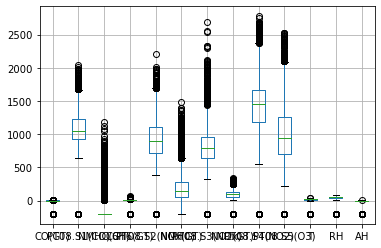

In [6]:
train_data.boxplot()

In [7]:
train_data = (train_data - train_data.mean()) / train_data.std()
train_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03,9.326000e+03
mean,3.413287e-16,1.706644e-16,-3.657093e-17,2.285683e-16,1.554265e-16,1.828547e-17,-6.095155e-17,3.657093e-17,8.533218e-17,-2.209494e-17,-1.818642e-15,7.923702e-16,2.041877e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.154069e+00,-3.886798e+00,-2.931822e-01,-5.091988e+00,-3.258620e+00,-1.439181e+00,-3.145553e+00,-2.051147e+00,-3.479777e+00,-2.604683e+00,-5.066225e+00,-4.863842e+00,-5.180050e+00
25%,4.439404e-01,-4.036533e-01,-2.931822e-01,3.678909e-02,-5.496156e-01,-4.624553e-01,-5.019334e-01,-3.965157e-02,-4.549636e-01,-6.119197e-01,1.262210e-02,-1.231021e-01,1.841962e-01
50%,4.555965e-01,-4.396710e-04,-2.931822e-01,1.348393e-01,-6.627877e-03,-1.083436e-01,-1.039032e-02,2.929580e-01,1.094647e-01,-7.727594e-02,1.642654e-01,1.683866e-01,1.917676e-01
75%,4.698428e-01,5.237380e-01,-2.931822e-01,2.806574e-01,6.164728e-01,4.481175e-01,5.126619e-01,5.859711e-01,5.796401e-01,6.142261e-01,3.279439e-01,4.376088e-01,2.003053e-01
max,5.902889e-01,3.060882e+00,9.628153e+00,1.537711e+00,3.904070e+00,5.094373e+00,5.938541e+00,2.225261e+00,3.003522e+00,3.411164e+00,8.213864e-01,9.801017e-01,2.252260e-01


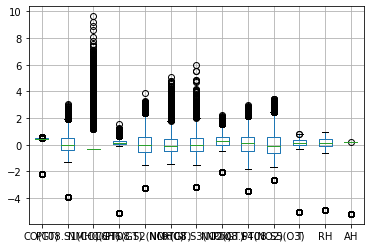

In [8]:
train_data.boxplot()

# 4
Единственные категориальные признаки - дата и время, которые в совокупности используются в качестве индекса, т.к. эта пара уникальна для каждой записи

# 5

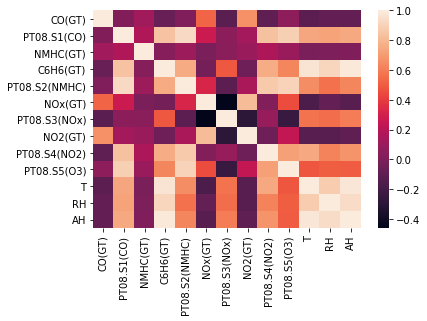

In [9]:
corr = train_data.corr()
sns.heatmap(corr)

# 6

In [10]:
train_data.count()

CO(GT)           9326
PT08.S1(CO)      9326
NMHC(GT)         9326
C6H6(GT)         9326
PT08.S2(NMHC)    9326
NOx(GT)          9326
PT08.S3(NOx)     9326
NO2(GT)          9326
PT08.S4(NO2)     9326
PT08.S5(O3)      9326
T                9326
RH               9326
AH               9326
dtype: int64

Пропущенных данных нет

# 8
### Предскажем признак 'C6H6(GT)'

In [11]:
data_X, data_Y = train_data.drop(columns='C6H6(GT)', axis=1).values, train_data['C6H6(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

###### Линейная регрессия без использования регуляризаторов

In [12]:
reg = LinearRegression()
reg.fit(train_x, train_y)
reg_predict = reg.predict(test_x)

P, p_value_P = pearsonr(reg_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(reg_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(reg_predict - test_y).describe()

Pearson correlation:  0.9995458338758447
Spearmen correlation:  0.9965908964278801
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    2798.000000
mean       -0.000623
std         0.030654
min        -0.448610
25%        -0.013163
50%         0.005096
75%         0.017753
max         0.155917
Name: C6H6(GT), dtype: float64

###### CART (бинарное решающее дерево)

In [13]:
dtr = DecisionTreeRegressor()

search = GridSearchCV(dtr, {'max_depth': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.max_depth
best = search.best_score_
print('best: ', best, ', max depth: ', n, sep='')

dtr = DecisionTreeRegressor(max_depth=n)
dtr.fit(train_x, train_y)
dtr_predict = dtr.predict(test_x)

P, p_value_P = pearsonr(dtr_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(dtr_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(dtr_predict[:15] - test_y[:15]).describe()

best: 0.9999951471423799, max depth: 37
Pearson correlation:  0.9999791181080111
Spearmen correlation:  0.9999868758018365
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    1.500000e+01
mean    -1.340857e-03
std      3.132441e-03
min     -1.005643e-02
25%     -2.775558e-17
50%      0.000000e+00
75%      2.081668e-17
max      1.110223e-16
Name: C6H6(GT), dtype: float64

###### Lasso-регуляризатор

In [14]:
lasso = Lasso()

search = GridSearchCV(lasso, {'alpha': np.arange(0.005, 5, 0.005)})
search.fit(train_x, train_y)
best = search.best_estimator_.alpha
print('Лучшее значение Альфа:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x, train_y)
lasso_predict = lasso.predict(test_x)
P, p_value_P = pearsonr(lasso_predict, test_y)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(lasso_predict, test_y)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(lasso_predict[:15] - test_y[:15]).describe()

Лучшее значение Альфа: 0.005
Коррелция по Пирсону:  0.9993963823506579
Корреляция по Спирмену:  0.9977827079180018
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    15.000000
mean     -0.028791
std       0.082749
min      -0.237559
25%      -0.026578
50%      -0.003081
75%       0.015893
max       0.036174
Name: C6H6(GT), dtype: float64

### Предскажем признак 'CO(GT)'

In [15]:
data_X, data_Y = train_data.drop(columns='CO(GT)', axis=1).values, train_data['CO(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

###### Линейная регрессия без использования регуляризаторов

In [16]:
reg = LinearRegression()
reg.fit(train_x, train_y)
reg_predict = reg.predict(test_x)

P, p_value_P = pearsonr(reg_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(reg_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(reg_predict - test_y).describe()

Pearson correlation:  0.6458820431394139
Spearmen correlation:  0.5924625772817175
P_VALUSE_P : 0.0
P_VALUSE_S : 8.177745430716572e-265


count    2798.000000
mean        0.010956
std         0.770341
min        -2.481278
25%        -0.295451
50%        -0.126053
75%         0.122662
max         2.868663
Name: CO(GT), dtype: float64

###### CART (бинарное решающее дерево)

In [17]:
dtr = DecisionTreeRegressor()

search = GridSearchCV(dtr, {'max_depth': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.max_depth
best = search.best_score_
print('best: ', best, ', max depth: ', n, sep='')

dtr = DecisionTreeRegressor(max_depth=n)
dtr.fit(train_x, train_y)
dtr_predict = dtr.predict(test_x)

P, p_value_P = pearsonr(dtr_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(dtr_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(dtr_predict[:15] - test_y[:15]).describe()

best: 0.5294530476944158, max depth: 4
Pearson correlation:  0.6910069517321713
Spearmen correlation:  0.7526221578141932
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    15.000000
mean     -0.076106
std       0.236919
min      -0.796103
25%      -0.106580
50%      -0.006955
75%       0.007939
max       0.228476
Name: CO(GT), dtype: float64

###### Lasso-регуляризатор

In [18]:
lasso = Lasso()

search = GridSearchCV(lasso, {'alpha': np.arange(0.005, 5, 0.005)})
search.fit(train_x, train_y)
best = search.best_estimator_.alpha
print('Лучшее значение Альфа:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x, train_y)
lasso_predict = lasso.predict(test_x)
P, p_value_P = pearsonr(lasso_predict, test_y)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(lasso_predict, test_y)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(lasso_predict[:15] - test_y[:15]).describe()

Лучшее значение Альфа: 0.005
Коррелция по Пирсону:  0.6460423873831933
Корреляция по Спирмену:  0.6010756369798399
P_VALUSE_P : 0.0
P_VALUSE_S : 1.6300382014240086e-274


count    15.000000
mean      0.023738
std       0.257313
min      -0.356118
25%      -0.156820
50%       0.008277
75%       0.147885
max       0.517997
Name: CO(GT), dtype: float64

### Попробуем избавиться от коррелирующих признаков

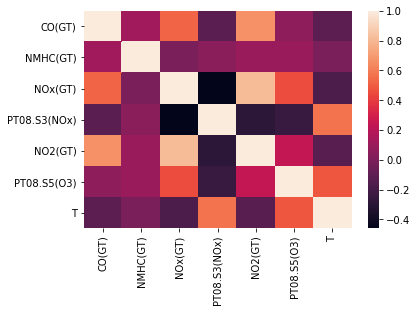

In [19]:
train_data = train_data.drop(columns='C6H6(GT)')
train_data = train_data.drop(columns='PT08.S1(CO)')
train_data = train_data.drop(columns='PT08.S2(NMHC)')
train_data = train_data.drop(columns='PT08.S4(NO2)')
train_data = train_data.drop(columns='AH')
train_data = train_data.drop(columns='RH')
corr = train_data.corr()
sns.heatmap(corr)

In [20]:
data_X, data_Y = train_data.drop(columns='CO(GT)', axis=1).values, train_data['CO(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

###### Линейная регрессия без использования регуляризаторов

In [21]:
reg = LinearRegression()
reg.fit(train_x, train_y)
reg_predict = reg.predict(test_x)

P, p_value_P = pearsonr(reg_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(reg_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(reg_predict - test_y).describe()

Pearson correlation:  0.6823875755404708
Spearmen correlation:  0.6556506180482436
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    2798.000000
mean        0.003551
std         0.752461
min        -2.318690
25%        -0.311137
50%        -0.133642
75%         0.153235
max         2.755206
Name: CO(GT), dtype: float64

###### CART (бинарное решающее дерево)

In [22]:
dtr = DecisionTreeRegressor()

search = GridSearchCV(dtr, {'max_depth': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.max_depth
best = search.best_score_
print('best: ', best, ', max depth: ', n, sep='')

dtr = DecisionTreeRegressor(max_depth=n)
dtr.fit(train_x, train_y)
dtr_predict = dtr.predict(test_x)

P, p_value_P = pearsonr(dtr_predict, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(dtr_predict, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(dtr_predict[:15] - test_y[:15]).describe()

best: 0.5104022597593152, max depth: 4
Pearson correlation:  0.7221286359627421
Spearmen correlation:  0.7592131578536246
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    15.000000
mean     -0.006040
std       0.325863
min      -0.587310
25%      -0.156672
50%      -0.054161
75%      -0.011018
max       0.662125
Name: CO(GT), dtype: float64

###### Lasso-регуляризатор

In [23]:
lasso = Lasso()

search = GridSearchCV(lasso, {'alpha': np.arange(0.005, 5, 0.005)})
search.fit(train_x, train_y)
best = search.best_estimator_.alpha
print('Лучшее значение Альфа:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x, train_y)
lasso_predict = lasso.predict(test_x)
P, p_value_P = pearsonr(lasso_predict, test_y)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(lasso_predict, test_y)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
(lasso_predict[:15] - test_y[:15]).describe()

Лучшее значение Альфа: 0.005
Коррелция по Пирсону:  0.6829714279033798
Корреляция по Спирмену:  0.6664178598416585
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


count    15.000000
mean     -0.093625
std       0.597518
min      -1.796850
25%      -0.303216
50%      -0.068954
75%       0.104376
max       0.741965
Name: CO(GT), dtype: float64

# Выводы
Опробовав методы регрессии предложенные для моего варианта в старой и новой версии методических рекомендаций для предсказания сильно- и слабокоррелирующих признаков, я пришел к следующему выводу:  
1. Методы регрессии прекрасно справляются с предсказанием признаков, сильно коррелирующих с другими
2. На признаках, слабокоррелирующих с другими, методы регрессии показывают не такие хорошие результаты
3. Результаты можно улучшить, если отбросить сильнокоррелирующие признаки
4. Метод CART показывает лучший результат по сравнению с линейной регрессией
5. Использование Lasso-регуляризатора позволяет улучшить результат линейной регрессии